In [1]:
%matplotlib inline
import random
import tensorflow as tf
from tensorflow_probability import distributions as tfd
from d2l import tensorflow as d2l

2024-01-15 14:26:33.115515: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-15 14:26:33.442274: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 14:26:33.442542: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 14:26:33.499039: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 14:26:33.651174: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-15 14:26:33.654977: I tensorflow/core/platform/cpu_feature_guard.cc:1

### 2.6.1 A Simple Example: Tossing Coins

In [7]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads,tails: ", [heads,tails])

heads,tails:  [43, 57]


In [8]:
fair_probs = tf.ones(2)/2
tfd.Multinomial(100, fair_probs).sample()

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([54., 46.], dtype=float32)>

In [13]:
tfd.Multinomial(100, fair_probs).sample()/100

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.49, 0.51], dtype=float32)>

In [14]:
counts = tfd.Multinomial(10000, fair_probs).sample()
counts / 10000

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.5066, 0.4934], dtype=float32)>

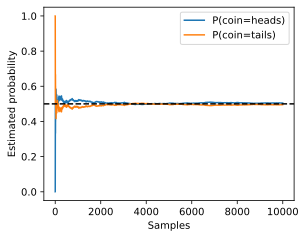

In [15]:
counts = tfd.Multinomial(1, fair_probs).sample(10000)
cum_counts = tf.cumsum(counts, axis=0)
estimates = cum_counts / tf.reduce_sum(cum_counts, axis=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();